In [1]:
# !pip install git+https://github.com/facebookresearch/segment-anything.git
# !pip install torch
import torch
from torchvision import transforms
from PIL import Image
from segment_anything import SamPredictor, sam_model_registry
import cv2 as cv
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(599.5), np.float64(386.5), np.float64(-0.5))

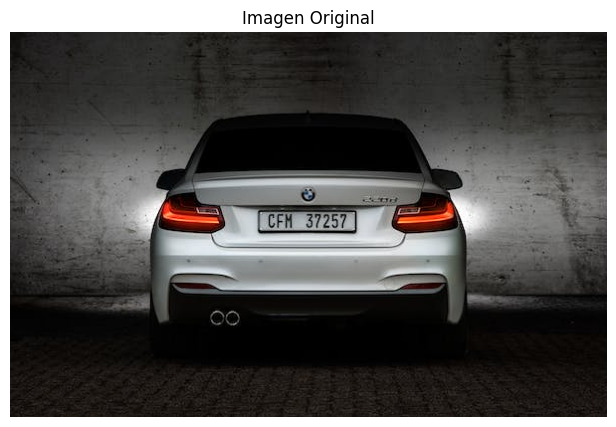

In [2]:
# Carga de la imagen
img = '03.jpeg'
img2Show = cv.imread(img)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img2Show, cv.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis('off')

In [3]:
# Carga el modelo SAM
sam = sam_model_registry["vit_h"](checkpoint="C:\\SW\\sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

# Carga la imagen y conviértela a RGB si no lo es
image = Image.open(img).convert('RGB')

# Define una transformación para redimensionar la imagen
transform = transforms.Compose([
    transforms.Resize(1024),  # Redimensiona el lado más largo a 1024 píxeles manteniendo la relación de aspecto
    transforms.ToTensor()  # Convierte la imagen a un tensor
])

# Aplica la transformación a la imagen
image_tensor = transform(image)

# Verifica las dimensiones del tensor de la imagen
print(image_tensor.shape)  # Esto debería mostrar [3, H, W]

# Añade una dimensión extra para el batch size
image_tensor = image_tensor.unsqueeze(0)

# Verifica nuevamente las dimensiones del tensor de la imagen
print(image_tensor.shape)  # Esto debería mostrar [1, 3, H, W]

# Ajusta la imagen en el predictor
predictor.set_image(image_tensor)



torch.Size([3, 1024, 1587])
torch.Size([1, 3, 1024, 1587])


ValueError: pic should be 2/3 dimensional. Got 4 dimensions.